In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
BaO_sep_relax = np.array([0,1,2,3,4,5,6])
BaO_eng_relax_Ry = np.array([-1868.8506029235,-1868.8422916915,
                  -1868.7968241379,-1868.7892128134,
                  -1868.7859397456,-1868.7842131765,
                  -1868.7819223419])
BaO_eng_relax = (BaO_eng_relax_Ry - -1868.8506029235)*13.6
BaO_force_relax = np.insert(np.diff(BaO_eng_relax),0,0)

sep_scf = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7])
BaO_eng_scf_Ry = np.array([-1868.8506029235,-1868.83506338,
                        -1868.81501702, -1868.80051401,
                        -1868.79071372, -1868.78404091,
                        -1868.77938139, -1868.77600306,
                        -1868.77348144, -1868.77152935,
                        -1868.76998521, -1868.76873688,
                        -1868.76770168, -1868.76683202,
                        -1868.76608357])
BaO_eng_scf = (BaO_eng_scf_Ry - -1868.8506029235)*13.6
BaO_force_scf = np.insert(np.diff(BaO_eng_scf),0,0)

CuO_eng_scf_Ry = np.array([-1868.8506029235, -1868.80681669,
                          -1868.76360865, -1868.74116813,
                          -1868.73090883, -1868.72635353,
                          -1868.7242, -1868.72319855,
                          -1868.72260715, -1868.72223557,
                          -1868.72200139, -1868.72183115,
                          -1868.72171420, -1868.72162156,
                          -1868.72154483])
CuO_eng_scf = (CuO_eng_scf_Ry - -1868.8506029235)*13.6
CuO_force_scf = np.insert(np.diff(CuO_eng_scf),0,0)

Y_eng_scf_Ry = np.array([-1868.8506029235,-1868.78138813,
                        -1868.65960884, -1868.55110556,
                        -1868.47578889, -1868.43348212,
                        -1868.41189542, -1868.40074105,
                        -1868.39450530, -1868.39062319,
                        -1868.38796770, -1868.38602225,
                        -1868.38454026, -1868.38338326,
                        -1868.38245571])
Y_eng_scf = (Y_eng_scf_Ry - -1868.8506029235)*13.6
Y_force_scf = np.insert(np.diff(Y_eng_scf),0,0)


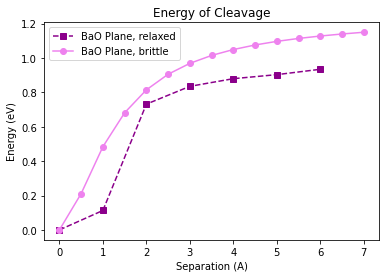

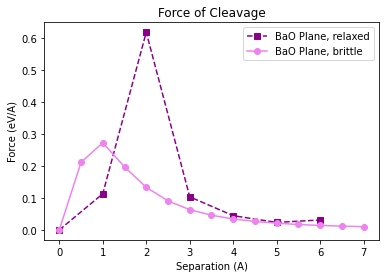

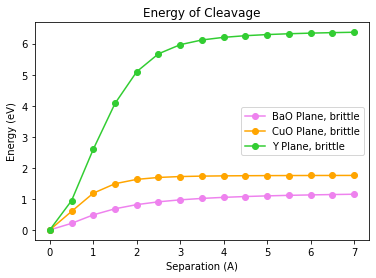

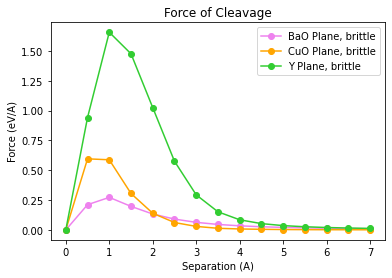

In [57]:
plt.plot(BaO_sep_relax, BaO_eng_relax, 's--',label = 'BaO Plane, relaxed', color = 'darkmagenta')
plt.plot(sep_scf, BaO_eng_scf, '-o',label = 'BaO Plane, brittle', color = 'violet')
plt.xlabel('Separation (A)')
plt.ylabel('Energy (eV)')
plt.title('Energy of Cleavage')
plt.legend()
plt.savefig('BaO_Eng.png')
plt.show()
plt.plot(BaO_sep_relax, BaO_force_relax, 's--',label = 'BaO Plane, relaxed', color = 'darkmagenta')
plt.plot(sep_scf, BaO_force_scf, 'o-',label = 'BaO Plane, brittle', color = 'violet')
plt.xlabel('Separation (A)')
plt.ylabel('Force (eV/A)')
plt.title('Force of Cleavage')
plt.legend()
plt.savefig('BaO_force.png')
plt.show()

plt.plot(sep_scf, BaO_eng_scf, '-o',label = 'BaO Plane, brittle', color = 'violet')
plt.plot(sep_scf, CuO_eng_scf, '-o',label = 'CuO Plane, brittle', color = 'orange')
plt.plot(sep_scf, Y_eng_scf, '-o',label = 'Y Plane, brittle', color = 'limegreen')
plt.xlabel('Separation (A)')
plt.ylabel('Energy (eV)')
plt.title('Energy of Cleavage')
plt.legend()
plt.savefig('All_Eng.png')
plt.show()
plt.plot(sep_scf, BaO_force_scf, 'o-',label = 'BaO Plane, brittle', color = 'violet')
plt.plot(sep_scf, CuO_force_scf, 'o-',label = 'CuO Plane, brittle', color = 'orange')
plt.plot(sep_scf, Y_force_scf, 'o-',label = 'Y Plane, brittle', color = 'limegreen')
plt.xlabel('Separation (A)')
plt.ylabel('Force (eV/A)')
plt.title('Force of Cleavage')
plt.legend()
plt.savefig('All_force.png')